In [33]:
import tensorflow as tf
import keras
from keras.applications import InceptionV3
from keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout, Lambda
import matplotlib.pyplot as plt

In [ ]:
#The dataset is obtained from the following link
#https://www.kaggle.com/noulam/tomato

In [34]:
#The links to the google drive directory
train = '/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train'
valid = '/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid'

In [35]:
#Define the image size
image_size = [224,224]

In [36]:
adam=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-6, amsgrad=False)


# add preprocessing layer to the front of inceptionv3. We can remove the top and last layer of inceptionv3 model as we don't them. 
conv_base = tf.keras.applications.InceptionV3(
    input_shape=(224,224,3),
    include_top=False,
    weights="imagenet"
)

#No need to retrain the model since we directly use the imagenet weights
conv_base.trainable = False
conv_base.summary()
#Adding the output fully connected layer with 10 nodes, and softmax activation. 
#Apart from that I have included a flatten layer following the convolutional base. 
model1 = Sequential()
model1.add(conv_base)
model1.add(Flatten())
model1.add(Dense(500,activation=('relu')))
model1.add(Dropout(0.4))
model1.add(BatchNormalization())
model1.add(Dense(10,activation=('softmax')))


model1.summary()

#Compile the model
model1.compile(
  loss='categorical_crossentropy',
  optimizer=adam,
  metrics=['accuracy']
)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_5 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               25600500  
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
batch_normalization_376 (Bat (None, 500)               2000      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5010      
Total params: 47,410,294
Trainable params: 25,606,510
Non-trainable params: 21,803,784
_________________________________

In [37]:
#Adding data augmentation to the training images
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#Rescaling or normalising the pixels in the image
test_datagen = ImageDataGenerator(
        rescale=1./255)

#Using the flow from directory method to read the images directly from the google drive
train_generator = train_datagen.flow_from_directory(
    directory='/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/train',
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    directory='/content/drive/My Drive/New Plant Diseases Dataset(Augmented)/valid',
    target_size=(224, 224),
    batch_size=16,
    class_mode="categorical"
)

Found 18365 images belonging to 10 classes.
Found 4595 images belonging to 10 classes.


In [38]:
#Model fitting stage
history = model1.fit_generator(train_generator,
                               epochs = 10, 
                               validation_data = test_generator,
                               steps_per_epoch = len(train_generator),
                               validation_steps = len(test_generator))

Epoch 1/10
1148/1148 [==============================] - 290s 253ms/step - loss: 0.8554 - accuracy: 0.7172 - val_loss: 0.7226 - val_accuracy: 0.7545
Epoch 2/10
1148/1148 [==============================] - 285s 248ms/step - loss: 0.6568 - accuracy: 0.7799 - val_loss: 0.5406 - val_accuracy: 0.8298
Epoch 3/10
1148/1148 [==============================] - 285s 248ms/step - loss: 0.6302 - accuracy: 0.7887 - val_loss: 0.7713 - val_accuracy: 0.7706
Epoch 4/10
1148/1148 [==============================] - 270s 235ms/step - loss: 0.5597 - accuracy: 0.8126 - val_loss: 0.4715 - val_accuracy: 0.8568
Epoch 5/10
1148/1148 [==============================] - 256s 223ms/step - loss: 0.5328 - accuracy: 0.8201 - val_loss: 0.4597 - val_accuracy: 0.8501
Epoch 6/10
1148/1148 [==============================] - 252s 220ms/step - loss: 0.5156 - accuracy: 0.8267 - val_loss: 0.6306 - val_accuracy: 0.7961
Epoch 7/10
1148/1148 [==============================] - 251s 219ms/step - loss: 0.5066 - accuracy: 0.8291 - val_

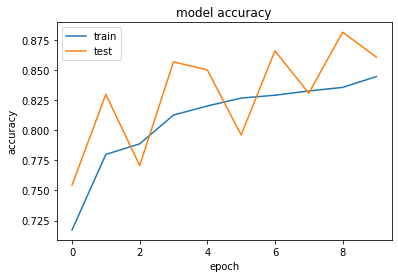

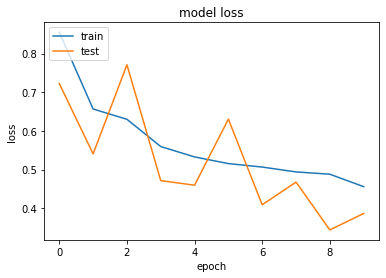

In [40]:
#Plotting the accuracy and loss
# summarize history for accuracy  
  

plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()
 
 # summarize history for loss  
  

plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

In [41]:
#Model evaluation
model1.evaluate_generator(generator=test_generator,
steps=len(test_generator))

#The test accuracy is 86.07% with the Inceptionv3 model

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.3865845799446106, 0.8607181906700134]